<a href="https://colab.research.google.com/github/Musa-Ali-Kazmi/Urdu-Text-Sentiment-Analysis/blob/main/Urdu_Text_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!unzip "/content/drive/MyDrive/DL-Assignment3/imdb_urdu_reviews_test.csv.zip" -d "/content/drive/MyDrive/DL-Assignment3"

Archive:  /content/drive/MyDrive/DL-Assignment3/imdb_urdu_reviews_test.csv.zip
  inflating: /content/drive/MyDrive/DL-Assignment3/imdb_urdu_reviews_test.csv  


In [ ]:
import pandas as pd

In [35]:
# Path to your CSV file
csv_file_path = "/content/drive/MyDrive/DL-Assignment3/imdb_urdu_reviews_test.csv.zip"

# Read the CSV file into a DataFrame
df_urdu = pd.read_csv(csv_file_path)


In [ ]:
!pip install urduhack

In [ ]:
import urduhack
urduhack.download()
from urduhack.normalization import normalize

89078/89078 [==============================] - 0s 0us/step


In [ ]:
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols

<Axes: xlabel='sentiment', ylabel='count'>

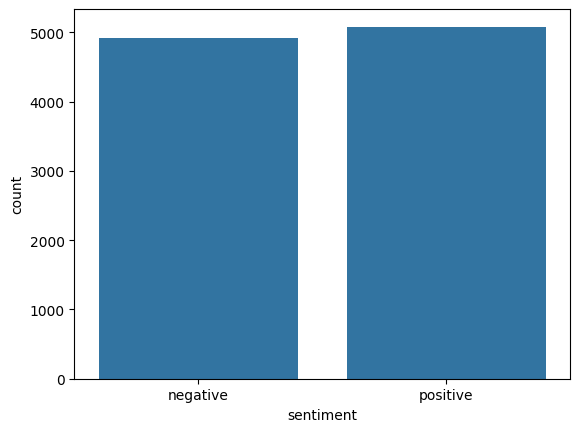

In [36]:
import seaborn as sns
sns.countplot(x = "sentiment", data = df)

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
# encoding the labels
le = LabelEncoder()
le.fit(df_urdu['sentiment'])
df_urdu['encoded_label'] = le.transform(df_urdu['sentiment'])

In [38]:
df_urdu['review'] = df_urdu['review'].apply(normalize)
df_urdu['review'] = df_urdu['review'].apply(remove_accents)
df_urdu['review'] = df_urdu['review'].apply(replace_urls)
df_urdu['review'] = df_urdu['review'].apply(replace_emails)
df_urdu['review'] = df_urdu['review'].apply(replace_currency_symbols)

In [46]:
from typing import FrozenSet
STOP_WORDS: FrozenSet[str] = frozenset("""اب
ابھی
اپنا
اپنے
اپنی
اٹھا
اس
اسے
اسی
اگر
ان
انہوں
انہی
انہیں
انھیں
او
اور
اے
ایسا
ایسے
ایسی
ایک
آ
آپ
آتا
آتے
آتی
آگے
آنا
آنے
آنی
آئے
آئی
آئیں
آیا
با
بڑا
بڑے
بڑی
بعد
بعض
بلکہ
بہت
بھی
بے
پاس
پر
پہلے
پھر
تا
تاکہ
تب
تجھ
تجھے
تک
تم
تمام
تمہارا
تمہارے
تمھارے
تمہاری
تمہیں
تمھیں
تھا
تھے
تھی
تھیں
تو
تیری
تیرے
جا
جاتا
جاتی
جاتے
جاتی
جانے
جانی
جاؤ
جائے
جائیں
جب
جس
جن
جنہوں
جنہیں
جو
جیسا
جیسے
جیسی
جیسوں
چاہیئے
چلا
چاہے
چونکہ
حالاں
حالانکہ
دو
دونوں
دوں
دے
دی
دیا
دیں
دیے
دیتا
دیتے
دیتی
دینا
دینے
دینی
دیئے
ڈالا
ڈالنا
ڈالنے
ڈالنی
ڈالے
ڈالی
ذرا
رکھا
رکھتا
رکھتے
رکھتی
رکھنا
رکھنے
رکھنی
رکھے
رکھی
رہ
رہا
رہتا
رہتے
رہتی
رہنا
رہنے
رہنی
رہو
رہے
رہی
رہیں
زیادہ
سا
سامنے
سب
سکتا
سو
سے
سی
شاید
صرف
طرح
طرف
عین
کا
کبھی
کچھ
کہہ
کر
کرتا
کرتے
کرتی
کرنا
کرنے
کرو
کروں
کرے
کریں
کس
کسے
کسی
کہ
کہا
کہے
کو
کون
کوئی
کے
کی
کیا
کیسے
کیوں
کیونکہ
کیے
کئے
گا
گویا
گے
گی
گیا
گئے
گئی
لا
لاتا
لاتے
لاتی
لانا
لانے
لانی
لایا
لائے
لائی
لگا
لگے
لگی
لگیں
لو
لے
لی
لیا
لیتا
لیتے
لیتی
لیکن
لیں
لیے
لئے
مجھ
مجھے
مگر
میرا
میرے
میری
میں
نا
نہ
نہایت
نہیں
نے
ہاں
ہر
ہم
ہمارا
ہمارے
ہماری
ہو
ہوا
ہوتا
ہوتے
ہوتی
ہوتیں
ہوں
ہونا
ہونگے
ہونے
ہونی
ہوئے
ہوئی
ہوئیں
ہے
ہی
ہیں
و
والا
والوں
والے
والی
وہ
وہاں
وہی
وہیں
یا
یعنی
یہ
یہاں
یہی
یہیں""".split())

def remove_stopwords(text: str):
  return " ".join(word for word in text.split() if word not in STOP_WORDS)

In [47]:
len(STOP_WORDS)

264

In [48]:
df_urdu[["review"]].head(3)

,review
0,یہ بے گھر خواتین کے بارے میں ایک دستاویزی فلم ...
1,بالکل بھی اچھ ،ی کام نہیں کیا گیا ، پوری فلم ص...
2,یہ عجیب بات ہے کہ کچھ لوگوں کا کیا حشر ہوتا ہے...


In [49]:
from urduhack.models.lemmatizer import lemmatizer
def lemitizeStr(str):
  lemme_str = ""
  temp = lemmatizer.lemma_lookup(str)
  for t in temp:
    lemme_str += t[0] + " "
  return lemme_str

In [50]:
df_urdu['lemmatized_text'] = df_urdu['review'].apply(lemitizeStr)

In [51]:
df_urdu["review"] = df["review"].apply(remove_stopwords)

In [ ]:
df_urdu['review'][1], df_urdu['lemmatized_text'][1]

In [60]:
df_urdu.head(3)

,review,sentiment,lemmatized_text,encoded_label
0,گھر خواتین بارے دستاویزی فلم ہے۔ لحاظ دلچسپ با...,negative,یہ بے گھر خواتین کے بارے میں ایک دستاویزی فلم ...,0
1,بالکل اچھ ،ی کام ، پوری فلم گرڈج کہیں ترتیب لو...,negative,بالکل بھی اچھ ،ی کام نہیں کیا گیا ، پوری فلم ص...,0
2,عجیب بات لوگوں حشر ہے۔ ڈی وی ڈی خوردہ فروش ڈسک...,negative,یہ عجیب بات ہے کہ کچھ لوگوں کا کیا حشر ہوتا ہے...,0


#BUILDING THE MODEL

In [92]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, GRU
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report


In [65]:
text_column = 'lemmatized_text'
label_column = 'encoded_label'

train_df, val_df = train_test_split(df_urdu, test_size = 0.2, random_state = 42)

max_words = 10000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(train_df[text_column])

X_train = tokenizer.texts_to_sequences(train_df[text_column])
X_val = tokenizer.texts_to_sequences(val_df[text_column])

In [70]:
max_sequence_length = 200
X_train = pad_sequences(X_train, maxlen = max_sequence_length, padding = 'post')
X_val = pad_sequences(X_val, maxlen = max_sequence_length, padding = 'post')

label_encoder = LabelEncoder()
label_encoder.fit(train_df[label_column])
y_train = label_encoder.transform(train_df[label_column])
y_val = label_encoder.transform(val_df[label_column])

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [93]:
# CONFIGURATION 1

# model = Sequential()
# model.add(Embedding(max_words, 100, input_length=max_sequence_length))
# model.add(Bidirectional(LSTM(128, return_sequences=True)))
# model.add(Bidirectional(LSTM(64)))
# model.add(Dense(len(label_encoder.classes_), activation = 'softmax'))

# CONFIGURATION 2

# model = Sequential()
# model.add(Embedding(max_words, 100, input_length=max_sequence_length))
# model.add(LSTM(128, return_sequences=True))
# model.add(LSTM(64))  # No longer bidirectional
# model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# CONFGURATION 3

model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_sequence_length))
model.add(Bidirectional(GRU(128, return_sequences=True)))
model.add(Bidirectional(GRU(64)))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))


In [94]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 100)          1000000   
                                                                 
 bidirectional_4 (Bidirecti  (None, 200, 256)          176640    
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 128)               123648    
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 1300546 (4.96 MB)
Trainable params: 1300546 (4.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


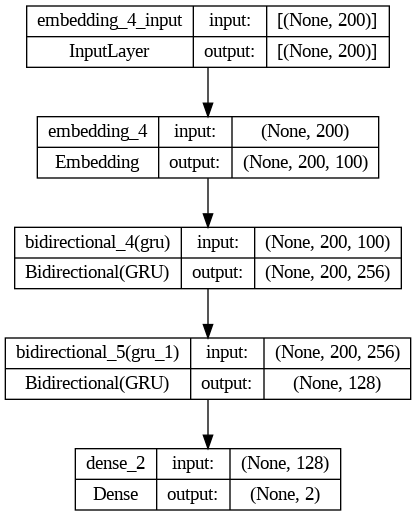

In [95]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
batch_size = 64
epochs = 10

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))


Epoch 1/10
125/125 [==============================] - 178s 1s/step - loss: 0.6514 - accuracy: 0.6061 - val_loss: 0.5770 - val_accuracy: 0.7025
Epoch 2/10
125/125 [==============================] - 160s 1s/step - loss: 0.3979 - accuracy: 0.8248 - val_loss: 0.4802 - val_accuracy: 0.7700
Epoch 3/10
125/125 [==============================] - 168s 1s/step - loss: 0.2219 - accuracy: 0.9125 - val_loss: 0.5664 - val_accuracy: 0.7850
Epoch 4/10
125/125 [==============================] - 169s 1s/step - loss: 0.1055 - accuracy: 0.9614 - val_loss: 0.7429 - val_accuracy: 0.7385
Epoch 5/10
125/125 [==============================] - 169s 1s/step - loss: 0.0517 - accuracy: 0.9822 - val_loss: 0.9698 - val_accuracy: 0.7730
Epoch 6/10
 88/125 [====================>.........] - ETA: 44s - loss: 0.0262 - accuracy: 0.9927

In [89]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)


63/63 [==============================] - 10s 147ms/step


In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Generate Classification Report
classification_rep = classification_report(y_true, y_pred_classes)

# Print the performance metrics
print("\nClassification Report:")
print(classification_rep)



Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.85      0.76       971
           1       0.82      0.65      0.73      1029

    accuracy                           0.75      2000
   macro avg       0.76      0.75      0.74      2000
weighted avg       0.76      0.75      0.74      2000

